# Training Metrics Visualisation
In this notebook, we are going to use the log files generated by the training processess to make some visualisations of the processes.

In [1]:
# standard project preamble
from pathgen.utils.seeds import set_seed
from pathgen.utils.paths import project_root

experiment_name = "new"
experiment_root = project_root() / "experiments" / experiment_name

global_seed = 123
set_seed(global_seed)

In [2]:
model_names = [  'ResNet_0.1',
                 'ResNet_0.01',
                 'ResNet_0.001',
                 'ResNet_0.0001',
                 'ResNet_1e-05']

In [3]:
import json

# load in the training metrics
def load_history(model_name):
    path = experiment_root / f"results_{model_name}.json"
    with open(path, 'r') as json_file:
        data = json.load(json_file)
    return data

histories = [load_history(m) for m in model_names]

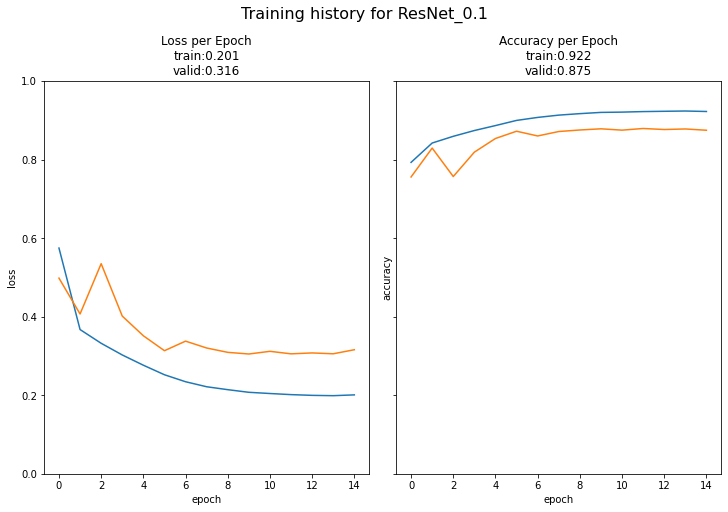

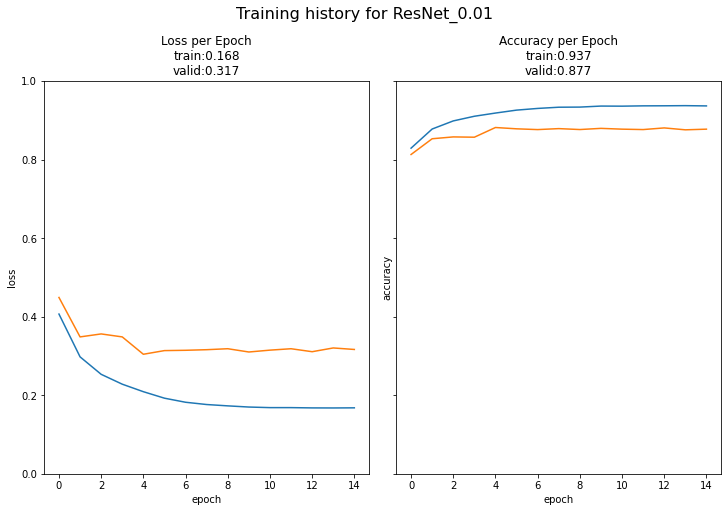

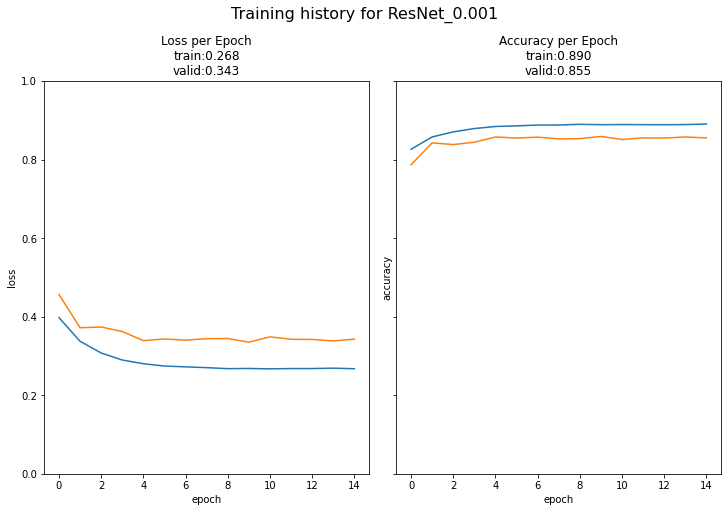

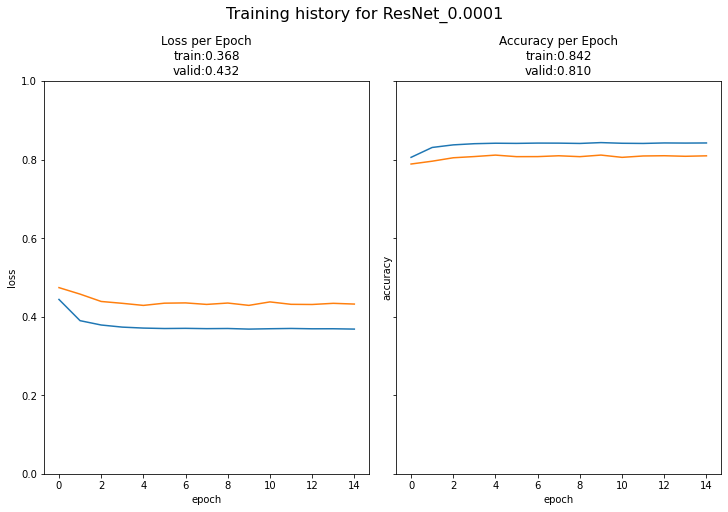

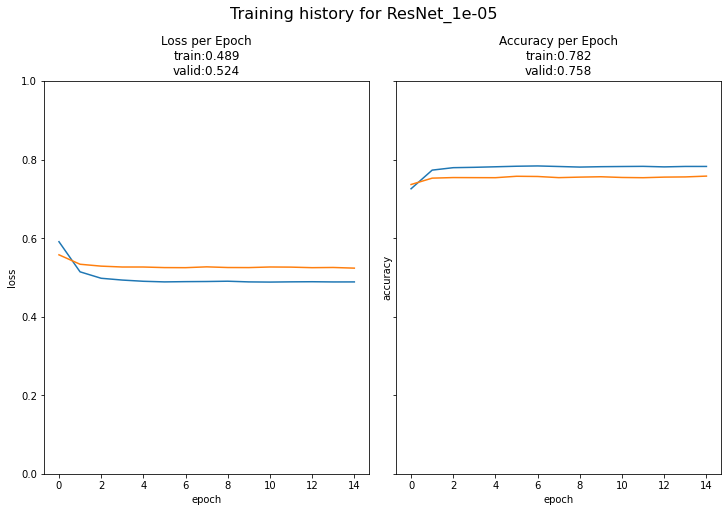

In [21]:
import matplotlib.pyplot as plt

# plot the metrics
def plot_training_history(model_name, history):
    train_acc = history['train_acc'][-1]
    valid_acc = history['valid_acc'][-1]
    train_loss = history['train_loss'][-1]
    valid_loss = history['valid_loss'][-1]    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7), constrained_layout=True, sharey=True)
    fig.suptitle(f'Training history for {model_name}', fontsize=16)

    ax1.set_title(f'Loss per Epoch\ntrain:{train_loss:.3f}\nvalid:{valid_loss:.3f}')
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax1.set_ylim([0, 1.5])
    ax1.plot(history['train_loss'])
    ax1.plot(history['valid_loss'])
    
    ax2.set_title(f'Accuracy per Epoch\ntrain:{train_acc:.3f}\nvalid:{valid_acc:.3f}')
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('epoch')
    ax2.set_ylim([0, 1.0])    
    ax2.plot(history['train_acc'])
    ax2.plot(history['valid_acc'])

for model_name, history in zip(model_names, histories):
    plot_training_history(model_name, history)

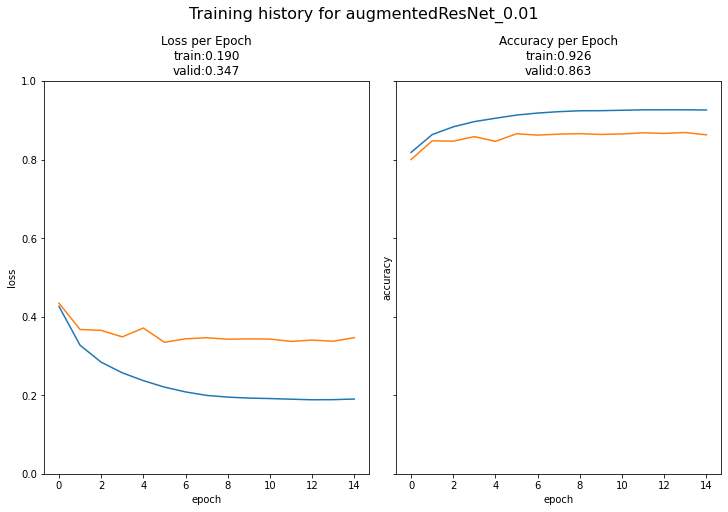

In [22]:
# looks like 0.01 is a good learning rate
# let's add an augmentation where we crop out the centre 224 pixels
# and see if having it as the expected input shape helps
cropped_history = load_history('augmentedResNet_0.01')
plot_training_history('augmentedResNet_0.01', cropped_history)

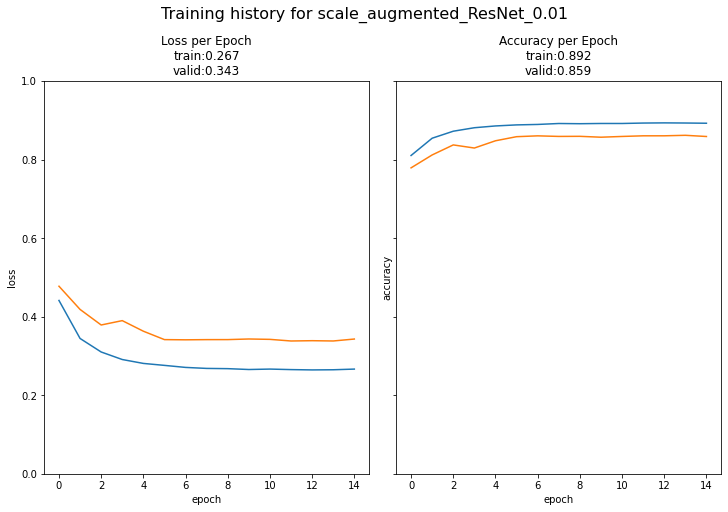

In [25]:
cropped_history = load_history('scale_augmented_ResNet_0.01')
plot_training_history('scale_augmented_ResNet_0.01', cropped_history)

In [ ]:
# do the confusion matrices
# it might be that you just need to tweek a threshold
# plot the ROC curve and the point where it bends (closest to top left corner) is the best threshold
# look at a selection of the ones they got wrong